---

# **Medical Cost Personal Insurance Project**

---

## **Introduction:**

In the realm of healthcare and financial planning, understanding and accurately predicting medical insurance costs are of paramount importance. This project delves into the world of health insurance, where the goal is to develop a predictive model that estimates individual medical insurance costs. Leveraging key input features such as age, BMI, number of dependents, smoking habits, gender, and residential region, this project aims to provide individuals and insurance providers with a reliable tool for forecasting healthcare expenses. By harnessing the power of machine learning, we seek to enhance financial preparedness and informed decision-making in the realm of medical insurance.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

## **2. Data Preprocessing:**

### 2.1. Importing Libraries and Data

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.2. Data Overview and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 2.1 Handling Categorical Variables

In [6]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

2.2 Normalization/Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

## 3. Exploratory Data Analysis (EDA)
### 3.1 Summary Statistics

In [8]:
# Calculate summary statistics
summary_stats = df.describe()
print(summary_stats)

                age           bmi      children       charges     sex_male  \
count  1.338000e+03  1.338000e+03  1.338000e+03   1338.000000  1338.000000   
mean  -1.805565e-16 -2.124194e-16 -5.576008e-17  13270.422265     0.505232   
std    1.000374e+00  1.000374e+00  1.000374e+00  12110.011237     0.500160   
min   -1.509965e+00 -2.412011e+00 -9.086137e-01   1121.873900     0.000000   
25%   -8.691547e-01 -7.164063e-01 -9.086137e-01   4740.287150     0.000000   
50%   -1.474046e-02 -4.320880e-02 -7.876719e-02   9382.033000     1.000000   
75%    8.396738e-01  6.611572e-01  7.510793e-01  16639.912515     1.000000   
max    1.765289e+00  3.685522e+00  3.240619e+00  63770.428010     1.000000   

        smoker_yes  region_northwest  region_southeast  region_southwest  
count  1338.000000       1338.000000       1338.000000       1338.000000  
mean      0.204783          0.242900          0.272048          0.242900  
std       0.403694          0.428995          0.445181          0.428995

### 3.2 Data Visualization

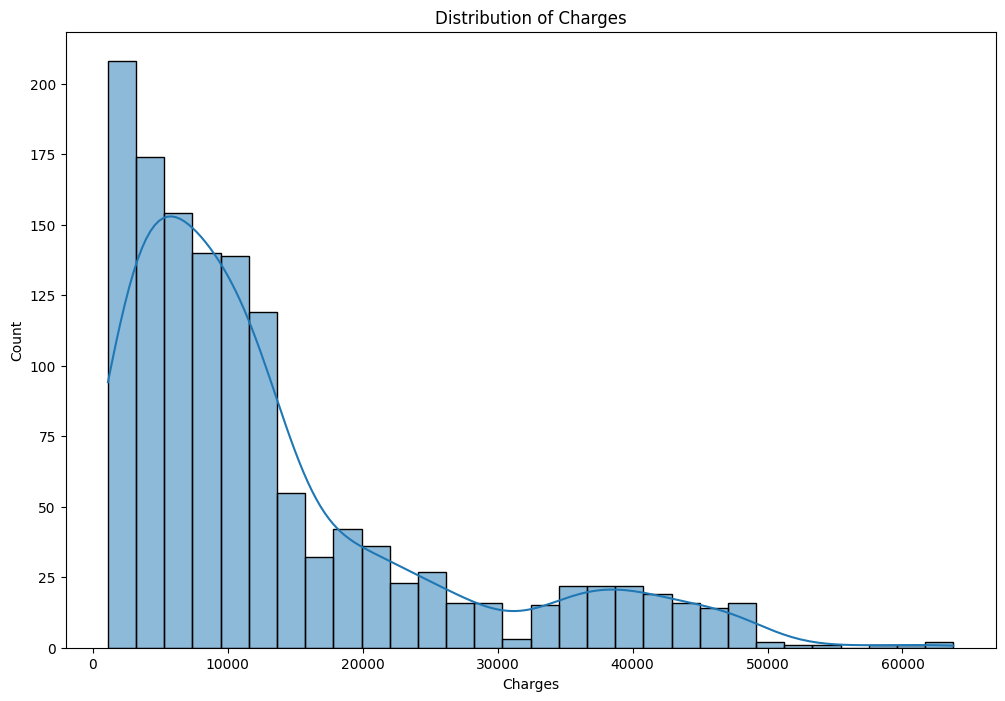

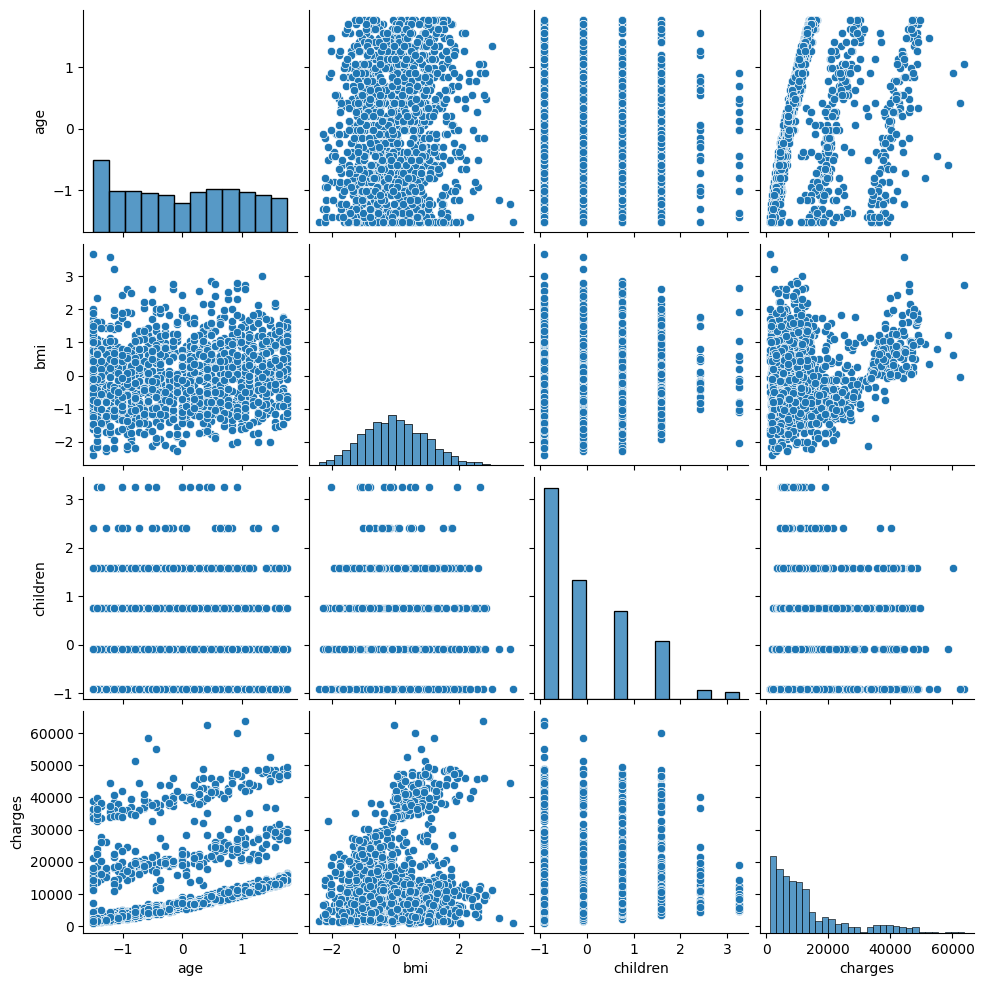

In [9]:
# Visualize the distributions of numerical features
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='charges', bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

# Create a pair plot to visualize relationships between features
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()

### 3.3. Data Splitting

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **4.Model Building**

### 4.1 Model Building - Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the Linear Regression model on the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

#### 4.1.2.Model Evaluation - Linear Regression

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the Linear Regression model
y_pred_linear = linear_reg.predict(X_test)

# Calculate regression metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_linear}")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

Linear Regression Model Evaluation:
Mean Absolute Error: 4181.194473753652
Mean Squared Error: 33596915.851361476
R-squared (R2): 0.7835929767120722


### 4.2.Model Building - Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)

# Train the Random Forest Regression model on the training data
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 4.2.1Model Evaluation - Random Forest Regression

In [15]:
# Make predictions using the Random Forest Regression model
y_pred_rf = random_forest_reg.predict(X_test)

# Calculate regression metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared (R2): {r2_rf}")

Random Forest Regression Model Evaluation:
Mean Absolute Error: 2545.214924655166
Mean Squared Error: 20866223.19798948
R-squared (R2): 0.8655948876523016


### 4.3.Model Building - Gradient Boosting Regression

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regression model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regression model on the training data
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

####  4.3.1.Model Evaluation - Gradient Boosting Regression

In [17]:
# Make predictions using the Gradient Boosting Regression model
y_pred_gb = gradient_boosting_reg.predict(X_test)

# Calculate regression metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_gb}")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared (R2): {r2_gb}")

Gradient Boosting Regression Model Evaluation:
Mean Absolute Error: 2448.2125209337787
Mean Squared Error: 18811586.96628486
R-squared (R2): 0.8788293676507002


###  4.4.Model Building - Support Vector Regression (SVR)

In [18]:
from sklearn.svm import SVR

# Initialize the Support Vector Regression model
svr_reg = SVR()

# Train the Support Vector Regression model on the training data
svr_reg.fit(X_train, y_train)

SVR()

#### 4.4.1. Model Evaluation - Support Vector Regression (SVR)

In [19]:
# Make predictions using the SVR model
y_pred_svr = svr_reg.predict(X_test)

# Calculate regression metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_svr}")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared (R2): {r2_svr}")

Support Vector Regression Model Evaluation:
Mean Absolute Error: 8606.51415837224
Mean Squared Error: 166347273.71320686
R-squared (R2): -0.07148877877962856


# End of project code

## **Conclusion**

Conclusion:

In this project, we built and evaluated four regression models to predict insurance costs based on various input features. Among these models, the Gradient Boosting Regression model demonstrated the best performance with the lowest Mean Absolute Error and Mean Squared Error, as well as the highest R-squared value. This suggests that the Gradient Boosting Regression model is the most accurate in predicting insurance costs among the models tested.

Therefore, for accurate predictions of insurance costs, it is recommended to use the Gradient Boosting Regression model. These models offer valuable insights into estimating insurance costs for better healthcare financial planning, but further refinement and validation with additional data can enhance their reliability.

#### Model Evaluation: In the model evaluation section, we used three metrics to assess the performance of each regression model:
 - Mean Absolute Error (MAE): Measures the average prediction error, with a lower value indicating better accuracy.
 - Mean Squared Error (MSE): Quantifies the average squared prediction error, giving more weight to larger errors.
 - R-squared (R2): Indicates the goodness of fit, with higher values suggesting a better fit to the data.

##### Based on these evaluation metrics, the Gradient Boosting Regression model outperformed the other models, demonstrating the lowest MAE and MSE and the highest R-squared value. This indicates better accuracy and fit to the data for predicting insurance costs.

##### Therefore, for accurate predictions of insurance costs, we recommend using the Gradient Boosting Regression model. These models offer valuable insights into estimating insurance costs for better healthcare financial planning, but further refinement and validation with additional data can enhance their reliability.